In [84]:
import pandas as pd
import numpy as np
from pathlib import Path
import os 
from datetime import timedelta
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
pd.set_option('display.max_columns', None)
%matplotlib inline

data_path = str(Path(os.getcwd())) + "/data/"

def write_to_pickle(dataframe, name):
    dataframe.to_pickle(data_path + name + ".pickle")
def read_from_pickle(name): 
    return pd.read_pickle(data_path + name + ".pickle")


In [2]:
df = read_from_pickle('preimputation')
df_imputed = pd.read_csv('data/final_dataset_analysis.csv')

In [3]:
df_small = df[['Gender', 'Tumor_grade', 'Gene_Idh1', 'Gene_Idh2','Tumor_Location',
       'Tumor_Position', 'Clinical_evolution', 'Surgery_type','Age_surgery', 'life_expectancy']]

#'ID_EC', 'IK_CLINIQUE', 'CHIR_IK_PRE', 'RX_IK_PRE', 'RX', 'CHEM'

In [4]:
df_final = df_imputed[['Gender', 'Tumor_grade', 'Gene_Idh1', 'Gene_Idh2','Tumor_Location',
       'Tumor_Position', 'Clinical_evolution', 'Surgery_type','Age_surgery', 'life_expectancy', 'Gene_Htert_C228T',
       'Gene_Htert_C250T', 'Gene_P53', 'Gene_Mgmt', 'Gene_Egfr', 'Gene_Mdm2',
       'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx', 'Gene_Ch1P', 'Gene_Ch19Q',
       'Gene_Ch10P', 'Gene_Ch10Q', 'Gene_Ch9P', 'Gene_Ch9Q', 'Tumor_Location',
       'Tumor_Position', 'Clinical_evolution', 'Surgery_type','Age_surgery', 'life_expectancy',
        'IDH_TERT', 'ID_EC', 'IK_CLINIQUE', 'CHIR_IK_PRE', 'RX_IK_PRE']]
df_final.head(2)

,Gender,Tumor_grade,Gene_Idh1,Gene_Idh2,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Age_surgery,life_expectancy,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Age_surgery,life_expectancy,IDH_TERT,ID_EC,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE
0,M,4,NC,NC,autre,G,P1,exérèse,60,268,NORMAL,ALTERE,NC,METHYLE,AMPLIFIE,AMPLIFIE,NORMAL,DELETE,Maintien,PERDU,PERDU,GAIN,GAIN,GAIN,PERDU,autre,G,P1,exérèse,60,268,4,P1,60,80,80
1,M,3,ALTERE,NORMAL,sus-T hémisp,G,TT ini,partielle,42,30,NORMAL,NORMAL,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Extinction diffuse,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,partielle,42,30,3,TTini,70,80,90


In [5]:
df_1 = df_small.dropna(axis=0, how='any')

In [ ]:
for col in df_1.columns:
    print('{0}\n  {1}\n'.format(col,df_1[col].isnull().value_counts()))

In [18]:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    # if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin


In [25]:
# Create bins so that we can cluster patients
cut_points = [90,180,270,360,450,540,720,1095,1460,1825,3650]
labels = ["3_months","6_months","9_months","12_months","15_months","18_months","2_years","3_years","4_years","5_years","10_years","10_plus_years"]
df_1["life_expectancy_bin"] = binning(df_1.life_expectancy, cut_points, labels)
print(pd.value_counts(df_1.life_expectancy_bin, sort=False))

3_months          90
6_months         132
9_months         139
12_months        164
15_months        183
18_months        163
2_years          222
3_years          254
4_years          125
5_years           69
10_years         217
10_plus_years    131
Name: life_expectancy_bin, dtype: int64


/Users/patricfulop/anaconda3/envs/cancer/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


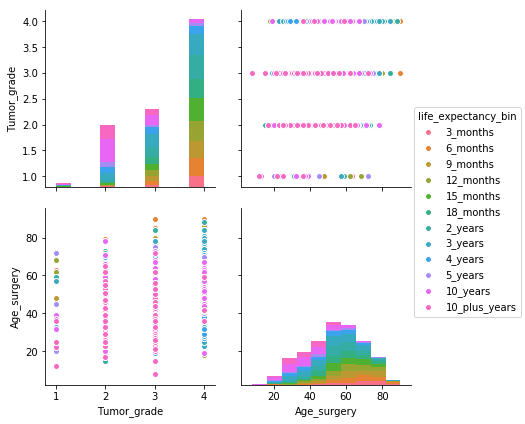

In [63]:
g = sns.pairplot(data=df_1,vars=['Tumor_grade','Age_surgery'],hue='life_expectancy_bin',size=3)

In [60]:
for column in df_1:
    unique_vals = np.unique(df_1[column])
    nr_vals = len(unique_vals)
    if nr_vals < 20:
        print('Number of values for attribute {}: {} -- {}'.format(column, nr_vals, unique_vals))
    else:
        print('Number of values for attribute {}: {}'.format(column, nr_vals))

Number of values for attribute Gender: 2 -- ['F' 'M']
Number of values for attribute Tumor_grade: 4 -- [ 1.  2.  3.  4.]
Number of values for attribute Gene_Idh1: 3 -- ['ALTERE' 'NC' 'NORMAL']
Number of values for attribute Gene_Idh2: 3 -- ['ALTERE' 'NC' 'NORMAL']
Number of values for attribute Tumor_Location: 11 -- ['Frontal' 'Rolandique' 'autre' 'cervelet' 'moelle/rachis' 'non précisé'
 'sus-T hémisp' 'sus-T hémisp+profond' 'sus-T profond' 'tronc cérébral'
 'ventriculaire']
Number of values for attribute Tumor_Position: 5 -- ['D' 'G' 'bilatéral' 'médian' 'non précisé']
Number of values for attribute Clinical_evolution: 4 -- ['P1' 'P2' 'P3' 'TT ini']
Number of values for attribute Surgery_type: 4 -- ['aucune' 'biopsie' 'exérèse' 'partielle']
Number of values for attribute Age_surgery: 78
Number of values for attribute life_expectancy: 1223
Number of values for attribute life_expectancy_bin: 12 -- ['10_plus_years' '10_years' '12_months' '15_months' '18_months' '2_years'
 '3_months' '3_

In [64]:
le_dict = dict() # Initialise an empty dictionary to keep all LabelEncoders
df_clean = df_1.copy(deep=True) # Make a copy of the DataFrame
# Loop over attributes by excluding the ones that are continuous and the target variable
for column in df_clean.drop(['Age_surgery', 'life_expectancy'], axis=1):  
    le = LabelEncoder().fit(df_1[column]) # Initialise the LabelEncoder and fit
    df_clean[column] = le.transform(df_1[column]) # Transform data and save in credit_clean DataFrame
    le_dict[column] = le # Store the LabelEncdoer in dictionary

We need dummies. 
- Q: should I standardize anything? Doesn't look like surgery age should be, but keep that in mind. 

In [99]:
df_clean = df_1.copy(deep=True)
df_clean_final = pd.get_dummies(df_clean.drop(['life_expectancy',"life_expectancy_bin"],axis=1))


In [100]:
df_clean_final.head(2)

,Tumor_grade,Age_surgery,Gender_F,Gender_M,Gene_Idh1_ALTERE,Gene_Idh1_NC,Gene_Idh1_NORMAL,Gene_Idh2_ALTERE,Gene_Idh2_NC,Gene_Idh2_NORMAL,Tumor_Location_Frontal,Tumor_Location_Rolandique,Tumor_Location_autre,Tumor_Location_cervelet,Tumor_Location_moelle/rachis,Tumor_Location_non précisé,Tumor_Location_sus-T hémisp,Tumor_Location_sus-T hémisp+profond,Tumor_Location_sus-T profond,Tumor_Location_tronc cérébral,Tumor_Location_ventriculaire,Tumor_Position_D,Tumor_Position_G,Tumor_Position_bilatéral,Tumor_Position_médian,Tumor_Position_non précisé,Clinical_evolution_P1,Clinical_evolution_P2,Clinical_evolution_P3,Clinical_evolution_TT ini,Surgery_type_aucune,Surgery_type_biopsie,Surgery_type_exérèse,Surgery_type_partielle
0,4.0,60.0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,3.0,42.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [101]:
#X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(["life_expectancy","life_expectancy_bin"], axis=1), df_clean.life_expectancy_bin,
                                                    #train_size=0.8, test_size=0.2, random_state=1)
#X_train.describe(include=['O'])
#X_train.describe(include=[np.number])
X_train, X_test, y_train, y_test = train_test_split(df_clean_final, df_clean.life_expectancy_bin,
                                                    train_size=0.8, test_size=0.2, random_state=1)

X_train.head(2)

,Tumor_grade,Age_surgery,Gender_F,Gender_M,Gene_Idh1_ALTERE,Gene_Idh1_NC,Gene_Idh1_NORMAL,Gene_Idh2_ALTERE,Gene_Idh2_NC,Gene_Idh2_NORMAL,Tumor_Location_Frontal,Tumor_Location_Rolandique,Tumor_Location_autre,Tumor_Location_cervelet,Tumor_Location_moelle/rachis,Tumor_Location_non précisé,Tumor_Location_sus-T hémisp,Tumor_Location_sus-T hémisp+profond,Tumor_Location_sus-T profond,Tumor_Location_tronc cérébral,Tumor_Location_ventriculaire,Tumor_Position_D,Tumor_Position_G,Tumor_Position_bilatéral,Tumor_Position_médian,Tumor_Position_non précisé,Clinical_evolution_P1,Clinical_evolution_P2,Clinical_evolution_P3,Clinical_evolution_TT ini,Surgery_type_aucune,Surgery_type_biopsie,Surgery_type_exérèse,Surgery_type_partielle
408,4.0,79.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1352,2.0,32.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


Now apply PCA to lower the dimensionality of our data - since we created a lot of it. And then perform a simple classification using a Decision Tree or K-means. Next Random Forests and then Regression with some polynomial function. We can try Gaussian NB after. 

In [103]:
X_train.describe(include=[np.number])

,Tumor_grade,Age_surgery,Gender_F,Gender_M,Gene_Idh1_ALTERE,Gene_Idh1_NC,Gene_Idh1_NORMAL,Gene_Idh2_ALTERE,Gene_Idh2_NC,Gene_Idh2_NORMAL,Tumor_Location_Frontal,Tumor_Location_Rolandique,Tumor_Location_autre,Tumor_Location_cervelet,Tumor_Location_moelle/rachis,Tumor_Location_non précisé,Tumor_Location_sus-T hémisp,Tumor_Location_sus-T hémisp+profond,Tumor_Location_sus-T profond,Tumor_Location_tronc cérébral,Tumor_Location_ventriculaire,Tumor_Position_D,Tumor_Position_G,Tumor_Position_bilatéral,Tumor_Position_médian,Tumor_Position_non précisé,Clinical_evolution_P1,Clinical_evolution_P2,Clinical_evolution_P3,Clinical_evolution_TT ini,Surgery_type_aucune,Surgery_type_biopsie,Surgery_type_exérèse,Surgery_type_partielle
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,3.307743,53.245533,0.383852,0.616148,0.166115,0.353408,0.480477,0.004633,0.455989,0.539378,0.012574,0.001324,0.002647,0.003309,0.001324,0.044341,0.746525,0.135010,0.041032,0.008604,0.003309,0.444739,0.464593,0.045003,0.002647,0.043018,0.024487,0.009927,0.001324,0.964262,0.022502,0.378557,0.281271,0.317670
std,0.829865,15.720445,0.486484,0.486484,0.372307,0.478186,0.499784,0.067929,0.498224,0.498612,0.111466,0.036370,0.051400,0.057448,0.036370,0.205921,0.435144,0.341847,0.198431,0.092386,0.057448,0.497101,0.498910,0.207380,0.051400,0.202965,0.154607,0.099172,0.036370,0.185697,0.148357,0.485188,0.449768,0.465725
min,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,55.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,65.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA + K_means

In [91]:
rs = {}
n_components = [1,2,3,5,10,20,30]
for nc in n_components:
    reduced_data = PCA(n_components=nc).fit_transform(X_train)
    kmeans_pca = KMeans(n_clusters=5, random_state=1337)
    kmeans_pca.fit(reduced_data)
    rs[nc] = adjusted_rand_score(y_train, kmeans_pca.labels_)
    print('nc={}, inertia={}, randscore={}'.format(nc, kmeans_pca.inertia_, rs[nc]))


nc=1, inertia=21180.800518609973, randscore=0.03709599721735551
nc=2, inertia=22337.144836538253, randscore=0.03709599721735551
nc=3, inertia=23242.20760375923, randscore=0.03814374392602899
nc=5, inertia=24651.10616858712, randscore=0.03815761537318549
nc=10, inertia=26327.52811690241, randscore=0.03709599721735551
nc=20, inertia=26813.525925619484, randscore=0.03709599721735551
nc=30, inertia=26840.793634603782, randscore=0.03709599721735551


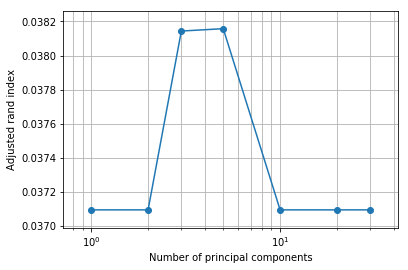

In [92]:
# Your code goes here

plt.figure()
plt.semilogx(n_components, [rs[nc] for nc in n_components], 'o-')
plt.margins(0.1, tight=True)
plt.grid(True, which='both')
plt.xlabel('Number of principal components')
plt.ylabel('Adjusted rand index')
plt.show()

# PCA +  GNB

In [104]:
X_train.shape

(1511, 34)

In [123]:
# Question is how many components do you train it with. 
# that's why you plot the variance ratio first to see where you have 95%
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)

# Here we can change it and add the decision tree if we want. 
classifier = GaussianNB()

# Use Cross Validation to determine the good parameteres
n_folds = 5
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1000)

# 1 since we have only one classifier - for now
score_array = np.zeros((1, cv.n_splits))
print(score_array.shape)


for i, (train_idx, valid_idx) in enumerate(cv.split(X_train_pca)):
        X_tr = X_train_pca[train_idx,:]
        X_val = X_train_pca[valid_idx,:]
        
        le = LabelEncoder()
        y_le = le.fit_transform(y_train)
        y_tr = y_le[train_idx]
        y_val = y_le[valid_idx]
        classifier.fit(X_tr,y_tr)
        score_array[:,i] = classifier.score(X_val, y_val)
        
print('Mean Accuracy: ' + str(np.mean(score_array))+ " Standard Error: "+ str(np.std(score_array)/np.sqrt(n_folds)))
#print(pd.DataFrame.from_dict(
 #       {'Model': labels, 
#        'Mean Accuracy':np.mean(score_array), 
  #       'Standard Error':np.std(score_array)/np.sqrt(n_folds)
##      })[['Model', 'Mean Accuracy', 'Standard Error']])

(1, 5)
Mean Accuracy: 0.131038401853 Standard Error: 0.00819450009297
